Imports

In [1]:
import pandas as pd
import numpy as np
import sys
import os

sys.path.append('../../')

from src.data.ee_utils import *
from src.data.data_utils import *
from src.data.dataset import *
from sklearn.model_selection import train_test_split


/u/ayang1/.conda/envs/CropTS/lib/python3.11/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
data_root = '/scratch/bbug/ayang1/datasets/lucas_fused/csvs/'

dfs = []
for ds in os.listdir(data_root):
    if ds.endswith('.csv'):
        print(ds)
        dfs.append(pd.read_csv(os.path.join(data_root, ds)))
fused_data = pd.concat(dfs)
        
# fused_data = pd.read_csv('/scratch/bbug/ayang1/datasets/lucas_fused/csvs/fused.csv')
fused_data = drop_labels(fused_data, min_labels=1000)


# Get bandwise data
bands = ['B1', 'B2', 'B3', 'B5', 'B7', 'VH', 'VV']
# bands = ['VH', 'VV']
band_data = get_band_arrays(fused_data, bands, lambda x: int(x.split('_')[0]))
print('Band data:', band_data.keys())

fused_Romania_subset1.csv
fused_Italy_subset3.csv
fused_Finland_subset1.csv
fused_Finland_subset3.csv
fused_Czech Republic_subset3.csv
fused_Romania_subset4.csv
fused_France_subset2.csv
fused_Germany_subset2.csv
fused_Bulgaria_subset1.csv
fused_Romania_subset3.csv
fused_Greece_subset2.csv
fused_Sweden_subset3.csv
fused_Estonia_subset4.csv
fused_Sweden_subset2.csv
fused_Finland_subset2.csv
fused_Romania_subset2.csv
fused_Italy_subset2.csv
fused_Italy_subset1.csv
fused_Germany_subset1.csv
fused_Greece_subset1.csv
fused_Germany_subset3.csv
fused_Poland_subset2.csv
fused_Sweden_subset4.csv
fused_Sweden_subset1.csv
fused_Czech Republic_subset1.csv
fused_Greece_subset3.csv
fused_Bulgaria_subset2.csv
fused_Bulgaria_subset3.csv
fused_Czech Republic_subset2.csv
fused_Spain_subset4.csv
fused_Finland_subset4.csv
fused.csv
fused_Poland_subset3.csv
fused_France_subset3.csv


/tmp/ipykernel_707881/509694193.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fused_data = pd.concat(dfs)


Dropped classes: ['B17', 'B18', 'B19', 'B21', 'B23', 'B33', 'B34', 'B35', 'B36', 'B37', 'B41', 'B42', 'B43', 'B44', 'B51', 'B54', 'B71', 'B73', 'B74', 'B75', 'B76', 'B77', 'B81', 'B82', 'B83', 'B84']
Dataset Length:  38327
Band data: dict_keys(['B1', 'B2', 'B3', 'B5', 'B7', 'VH', 'VV'])


In [10]:
fused_data.country.unique()

array(['Romania', 'Italy', 'Finland', 'Czech Republic', 'France',
       'Germany', 'Bulgaria', 'Greece', 'Sweden', 'Estonia', 'Poland',
       'Spain', 'Austria', 'Belgium', 'Croatia', 'Denmark', 'Hungary',
       'Ireland', 'Latvia', 'Lithuania', 'Luxembourg', 'Netherlands',
       'Portugal', 'Slovakia', 'Slovenia'], dtype=object)

In [11]:
print(np.unique(fused_data['LABEL'], return_counts=True)[1].sum())

38327


In [4]:
data = np.stack([band[:, :] for band in band_data.values()], axis=1)
labels = fused_data['LABEL'].to_numpy()

In [20]:

assert data.shape[0] == labels.shape[0]

dataset = dataset_split(data, labels)

In [21]:
# save_path = '/scratch/bbug/ayang1/datasets/lucas_fused/sar_only'

for k, v in dataset.items():
    np.save(os.path.join(save_path, k), v, allow_pickle=True)

In [40]:
band_masks = {}

for i in np.unique(labels):
    mask = labels == i
    band_masks[i] = mask
    
print(band_masks.keys())    


dict_keys(['B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B22', 'B31', 'B32', 'B52', 'B53', 'B55'])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


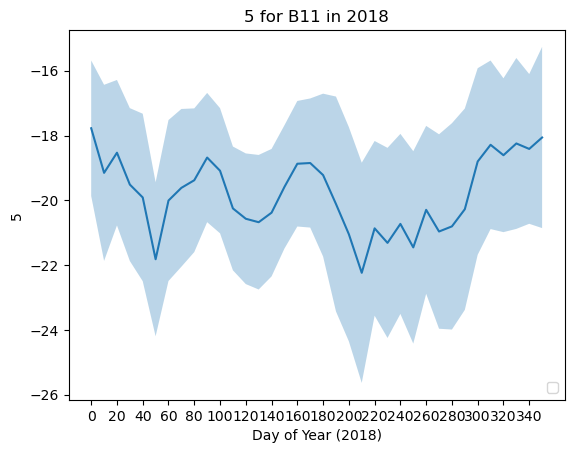

In [47]:
crop_type = 'B11'
band = 5
b11 = data[band_masks['B11']].astype(float)
band_averages = np.mean(b11, axis=0)
band_stds = np.std(b11, axis=0)

mean = band_averages[band]
std = band_stds[band]

plt.plot(mean)
plt.fill_between(np.arange(len(mean)), mean - std, mean + std, alpha=0.3)

plt.xlabel('Day of Year (2018)')
plt.ylabel(f'{band}')
plt.title(f'{band} for {crop_type} in 2018')
plt.xticks(np.arange(0, 36, 2), np.arange(0, 360, 20))
plt.legend(loc='lower right')
plt.show()